In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [39]:
def getCSV():
    dfl = pd.read_csv(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\NationalAvgPriceGoods.csv')
    return dfl
    
df = getCSV()
print(set(df['Consumer Item'].tolist()))


{'Pork loin chops per kg', 'Cream liqueur - take home (70cl bottle)', 'Roast beef - topside or rib per kg', 'Filtered cigarettes per 20 pk', 'Potatoes 2.5 kg', 'Lamb - whole leg / half leg per kg', 'Irish cheddar per kg', 'Petrol - unleaded per litre', 'Nightclubs fee', "Gent's dry cut fee", 'Lamb loin chops per kg', 'Lamb gigot chops per kg', 'Large eggs per half dozen', "Gent's wash, cut, and blow dry fee", 'Cooked ham per kg', 'White granulated sugar per 1 kg', 'Best back rashers per kg', 'Sherry - take home (75cl bottle)', 'Stout - take home (50cl can)', 'Stout - draught bar (1 pint)', 'Wine - bar (187ml bottle)', 'Striploin steak per kg', 'Fresh fillet of whiting per kg', 'Lager - take home (50cl can)', 'Uncooked chicken medium size 1.6kg', 'Onions per kg', 'Bread, white sliced pan, large (800g)', 'Carrots per kg', 'Orange juice per litre', 'Cider - take home (50cl can)', 'Full fat milk per 2 litre', 'Whiskey - bar (single) per ½ glass', 'Wine - take home (75cl bottle)', 'Potatoes

In [30]:
item1="Brandy - bar (single) per ½ glass"
item2="Whiskey - bar (single) per ½ glass"
item3="Vodka - bar (single) per ½ glass"
filtered_df = df[((df['Consumer Item'] == item1) | (df['Consumer Item'] == item2) | (df['Consumer Item'] == item3)) & df['Month'].apply(lambda x: x if ("2024" in x) or ("2023" in x) or ("2022" in x) else "")]
print(filtered_df)

              STATISTIC Label          Month  \
9261   National Average Price   2022 January   
9262   National Average Price   2022 January   
9263   National Average Price   2022 January   
9337   National Average Price  2022 February   
9338   National Average Price  2022 February   
...                       ...            ...   
11010  National Average Price  2023 December   
11011  National Average Price  2023 December   
11085  National Average Price   2024 January   
11086  National Average Price   2024 January   
11087  National Average Price   2024 January   

                            Consumer Item  UNIT  VALUE  
9261   Whiskey - bar (single) per ½ glass  Euro  4.779  
9262    Brandy - bar (single) per ½ glass  Euro  5.210  
9263     Vodka - bar (single) per ½ glass  Euro  4.813  
9337   Whiskey - bar (single) per ½ glass  Euro  4.779  
9338    Brandy - bar (single) per ½ glass  Euro  5.220  
...                                   ...   ...    ...  
11010   Brandy - bar (si

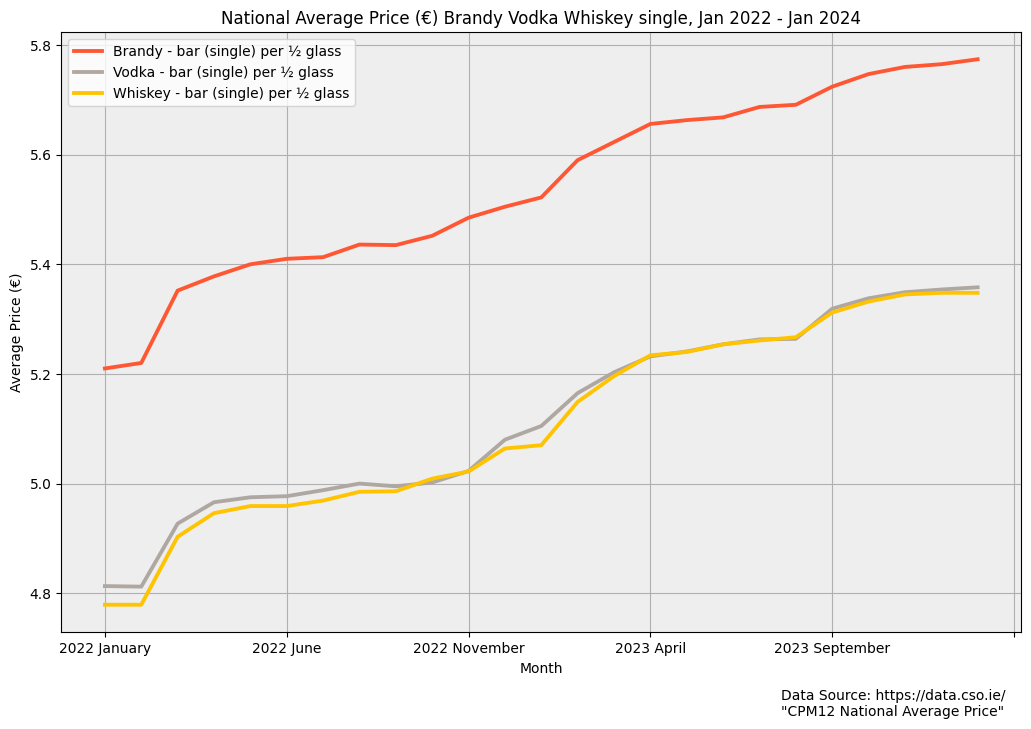

In [36]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

grouped_data = filtered_df.groupby('Consumer Item')

colors = ["#FF5733", "#AFA7A1", "#FFC300"]
i = 0
for group in grouped_data.groups:
    grouped_data.get_group(group).plot(x='Month', y='VALUE', ax=ax, linewidth=2.75, label=group, color=colors[i])
    i += 1
    
title_string = 'National Average Price (€) Brandy Vodka Whiskey single, Jan 2022 - Jan 2024'

plt.title(title_string)
plt.xlabel('Month')
plt.ylabel('Average Price (€)')
#plt.legend(title='Area', loc='upper left', labels=[], fontsize='11')
#plt.legend().remove()
ax.set_facecolor('#EEEEEE') 
plt.tight_layout()
plt.grid(True)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)
plt.text(0.75, -0.14, "Data Source: https://data.cso.ie/ \n\"CPM12 National Average Price\"", ha='left', transform=ax.transAxes)

plt.savefig("AvgPrice-Spririts-2022-2024.png")
    
plt.show()

In [40]:
df = getCSV()
print(df)

              STATISTIC Label          Month  \
0      National Average Price  2011 December   
1      National Average Price  2011 December   
2      National Average Price  2011 December   
3      National Average Price  2011 December   
4      National Average Price  2011 December   
...                       ...            ...   
11091  National Average Price   2024 January   
11092  National Average Price   2024 January   
11093  National Average Price   2024 January   
11094  National Average Price   2024 January   
11095  National Average Price   2024 January   

                               Consumer Item  UNIT   VALUE  
0         White, self raising flour per 2 kg  Euro     NaN  
1            Brown, wholemeal flour per 2 kg  Euro     NaN  
2      Bread, white sliced pan, large (800g)  Euro     NaN  
3      Bread, brown sliced pan, large (800g)  Euro     NaN  
4                         Spaghetti per 500g  Euro     NaN  
...                                      ...   ...     ..

In [77]:
item1 = "Gent's wash, cut, and blow dry fee"
item2 = "Gent's dry cut fee"
filtered_df = df[(df['Consumer Item'] == item2) & df['Month'].apply(lambda x: x if ("2024 January" in x) or ("2023 January" in x) or ("2020 January" in x) or ("2015 January" in x) or ("2012 January" in x)else "")]
print(filtered_df)

              STATISTIC Label         Month       Consumer Item  UNIT   VALUE
149    National Average Price  2012 January  Gent's dry cut fee  Euro  11.643
2885   National Average Price  2015 January  Gent's dry cut fee  Euro  11.949
7445   National Average Price  2020 January  Gent's dry cut fee  Euro  13.993
10181  National Average Price  2023 January  Gent's dry cut fee  Euro  18.060
11093  National Average Price  2024 January  Gent's dry cut fee  Euro  19.384


In [1]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

bars = plt.bar(filtered_df['Month'], filtered_df['VALUE'], color='red', width=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, "€"+str(round(yval, 2)), ha='center', va='bottom')

title_string = 'National Average Price (€) Dry cut men (haircut). Ireland.'

plt.title(title_string)
plt.xlabel('Month')
plt.ylabel('Average Price (€)')
plt.xticks(rotation=0)
#plt.legend(title='Area', loc='upper left', label="None", fontsize='11')
plt.legend().remove()
ax.set_facecolor('#EEEEEE') 
plt.tight_layout()


plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)
plt.text(0.75, -0.11, "Data Source: https://data.cso.ie/ \n\"CPM12 National Average Price\"", ha='left', transform=ax.transAxes)

plt.savefig("AvgPrice-Haircut-2012-2023.png")

plt.show()

NameError: name 'plt' is not defined